In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
gdp_df = pd.read_csv('C:\\Users\\Lauren Key\\Documents\\DA11\\Python\\projects\\undata-Lrn91323\\data\\gdp_percapita.csv.csv')

5. How many rows/columns?

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [4]:
print(type(gdp_df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
del gdp_df['Value Footnotes']


# Rename the remaining columns
gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)

# Display the updated DataFrame
print(gdp_df.head())


       Country  Year  GDP_Per_Capita
0  Afghanistan  2021     1517.016266
1  Afghanistan  2020     1968.341002
2  Afghanistan  2019     2079.921861
3  Afghanistan  2018     2060.698973
4  Afghanistan  2017     2096.093111


In [7]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [8]:
gdp_df['Year'].nunique()

33

In [9]:
gdp_df['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [10]:
gdp_df.Country.value_counts().reset_index()


,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [11]:
count_df = gdp_df.Country.value_counts().reset_index().rename(
columns={'index':'Country',
         'Country': 'count'})



In [12]:
count_df.shape

(242, 2)

In [13]:
count_df['count']==33

,count,count
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
237,False,False
238,False,False
239,False,False
240,False,False


In [14]:
count_df[count_df['count']==33]

,count,count
0,NaN,33.0
1,NaN,33.0
2,NaN,33.0
3,NaN,33.0
4,NaN,33.0
...,...,...
237,NaN,NaN
238,NaN,NaN
239,NaN,NaN
240,NaN,NaN


In [15]:
gdp_df['Year'].value_counts().sort_index()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020

In [16]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]


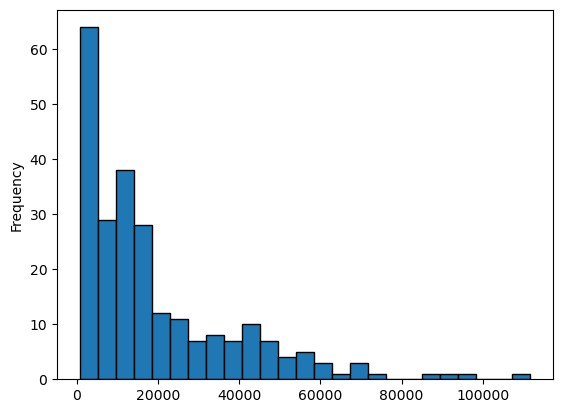

In [17]:
gdp_2020['GDP_Per_Capita'].plot(kind='hist',
                                   edgecolor='black',
                                   bins = 25);

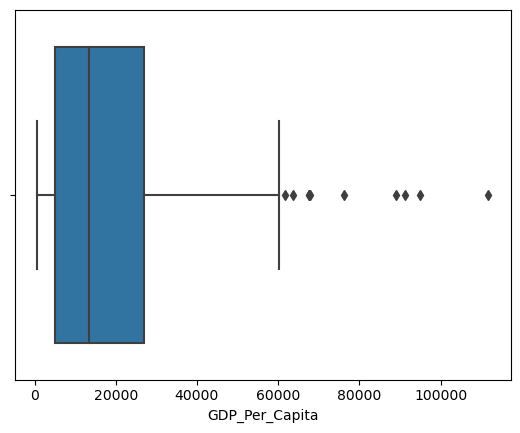

In [18]:
sns.boxplot(data =gdp_2020, x='GDP_Per_Capita');

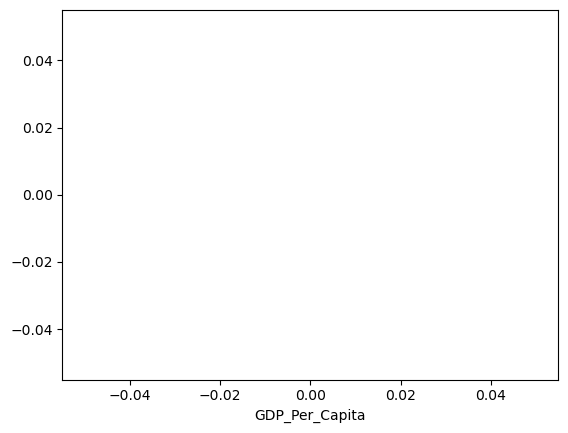

In [19]:
sns.scatterplot(data =gdp_2020, x='GDP_Per_Capita');

Density plot includes negative values.

9. What was the median GDP per capita value in 2020?

10. GDP per capita values for the years 1990, 2000, 2010, and 2020

In [21]:
years_of_interest = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df[gdp_df['Year'].isin(years_of_interest)]
print(gdp_decades.head())

                        Country  Year  GDP_Per_Capita
1                   Afghanistan  2020     1968.341002
11                  Afghanistan  2010     2026.163818
22  Africa Eastern and Southern  2020     3455.023119
32  Africa Eastern and Southern  2010     3513.315920
42  Africa Eastern and Southern  2000     2897.140841


Values have increased overtime, the bar plot is the most effective in demonstrating the increase.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [26]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [27]:
gdp_df[gdp_df['Year']==2020]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [28]:
gdp_df[gdp_df['Year']==2020].nlargest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [30]:
top_country = gdp_df[gdp_df['Year']==2020].nlargest(1, 'GDP_Per_Capita')['Country'].tolist()[0]

In [31]:
top_country

'Luxembourg'

In [33]:
gdp_df[gdp_df['Country']==top_country]

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


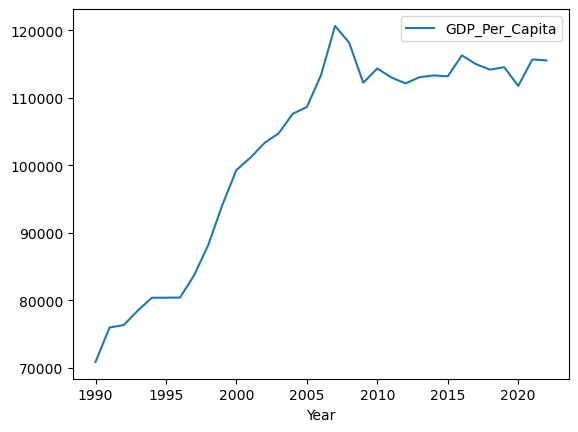

In [38]:
gdp_df[gdp_df['Country']==top_country].plot(x='Year', y='GDP_Per_Capita',
                                                           kind='line');

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [39]:
gdp_df[gdp_df['Year']== 2020].nsmallest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


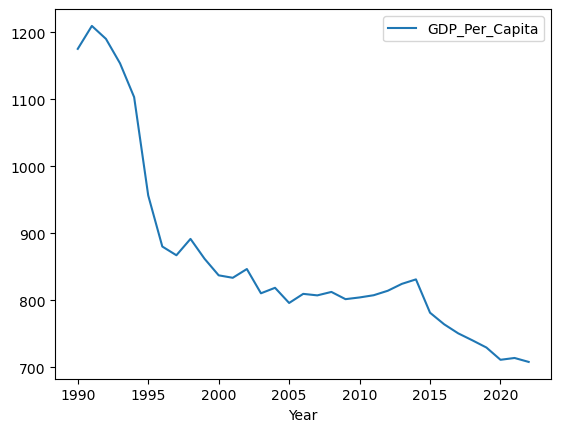

In [40]:
bottom_country= gdp_df[gdp_df['Year']== 2020].nsmallest(1, 
                                                        'GDP_Per_Capita')['Country'].tolist()[0]
gdp_df[gdp_df['Country']== bottom_country].plot(x = 'Year', y= 'GDP_Per_Capita', kind= 'line');

In [66]:
# 14.

internet_df = pd.read_csv(r"C:\Users\Lauren Key\Documents\DA11\Python\projects\undata-Lrn91323\data\internet_use.csv.csv",
                         nrows = 4495)

In [67]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes,Unnamed: 4,Unnamed: 5
0,Afghanistan,2014,6.390000,NaN,NaN,NaN
1,Afghanistan,2013,5.900000,NaN,NaN,NaN
2,Afghanistan,2012,5.454545,NaN,NaN,NaN
3,Afghanistan,2011,5.000000,NaN,NaN,NaN
4,Afghanistan,2010,4.000000,NaN,NaN,NaN


15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [68]:
internet_df = internet_df.drop(columns=['Value Footnotes','Unnamed: 4', 'Unnamed: 5'])
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [74]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [75]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


16. Look at the number of observations in this dataset per year. What do you notice?

In [76]:
internet_df.groupby('Year')['Country'].count().sort_index()

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Country, dtype: int64

17. What is the first year to have a non-zero internet users percentage value?

In [78]:
internet_df[internet_df['Internet_Users_Pct']> 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


18. How does the distribution of internet users percent differ for 2000 and 2014?

<Axes: >

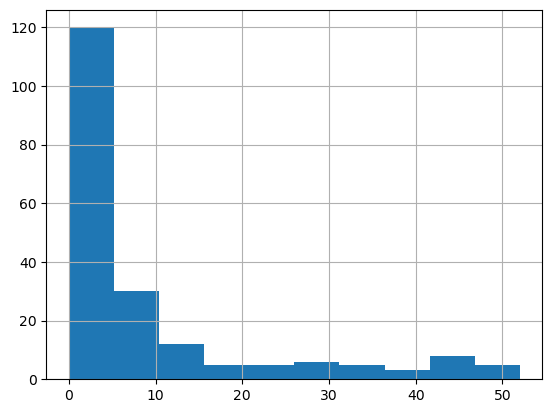

In [79]:
internet_df[internet_df['Year']== 2000]['Internet_Users_Pct'].hist()

19. For how many countries was the percentage of internet users below 5% in 2014?

In [81]:
internet_df.loc[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct']<5)]

,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames

In [82]:
gdp_and_internet_use = pd.merge(
    left = gdp_df,
    right = internet_df,
    how = 'outer')

In [83]:
gdp_and_internet_use.shape

(8736, 4)

In [84]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [86]:
countries = gdp_and_internet_use[gdp_and_internet_use['Year']== 2014].sort_values('Internet_Users_Pct',
                                                                                     ascending = False)['Country'].tolist()[:3]

In [87]:
countries

['Iceland', 'Bermuda', 'Norway']

C:\Users\Lauren Key\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


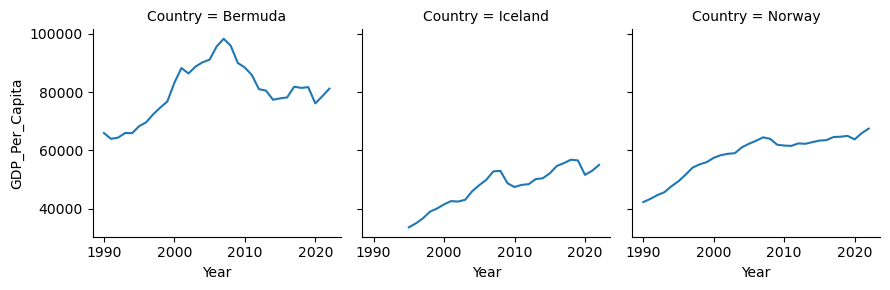

In [89]:
g = sns.FacetGrid(data = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(countries)],
                 col = 'Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita');